<a href="https://colab.research.google.com/github/jcardonamde/datasets_ml/blob/main/03_datasets_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2: Parte 1**

La tarea para esta semana es proponer dos posibles conjuntos de datos que les gustaría trabajar para el proyecto 2.  

Escogerán el conjunto de datos de primera opción, y un conjunto de datos de reserva en caso de que el primero propuesto no se apruebe.  

Estos datos pueden proceder de cualquier fuente y ser sobre cualquier tema con estas limitaciones:

* los datos deben estar disponibles para su uso (es su responsabilidad garantizar que la licencia indique que pueden utilizarlos).
* los datos deben ser adecuados para un ambiente profesional.
* los datos NO deben contener información personal.
* los datos NO deben ser de un conjunto de datos usados en alguna tarea o clase del curso.

Asegúrense de seleccionar un conjunto de datos con el que sea razonable trabajar en el tiempo que nos queda. Piensen qué preguntas podrían responder con el conjunto de datos que seleccionen. 

Deben proponer dos conjuntos de datos que tengan cada uno un componente de aprendizaje supervisado. Pueden elegir un problema de regresión o clasificación para cada conjunto de datos propuesto.  



---



## **Primera opción: conjunto de datos 1**

**1) Fuente de datos**



Este es un conjunto de datos principal publicado por la Comisión de Taxis y Limusinas de la Ciudad de Nueva York, que incluye la hora de recogida, las coordenadas geográficas, la cantidad de pasajeros y varias otras variables.

La fuente de datos fue buscada y descargada desde el sitio web Kaggle. En la publicación asociada a la tematica en cuestión. ([Ver fuente](https://www.kaggle.com/c/nyc-taxi-trip-duration))


In [211]:
# Importamos las bibliotecas requeridas para el manejo y revisión inicial de nuestros datos
import pandas as pd
import numpy as np

In [212]:
# Importamos el data set y lo visualizamos en un DataFrame
filename = ('/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Proyectos/Datasets/nyc_taxi_trip_duration.csv')
df = pd.read_csv(filename)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


**2) Breve descripción de datos**

En algún momento u otro, casi todos hemos usado un un Uber u otro servicio de transporte en esta era digital para dar un paseo. Los servicios de transporte compartido son servicios que utilizan plataformas habilitadas en línea para conectarse entre pasajeros y conductores locales que utilizan sus vehículos personales.

En la mayoría de los casos son un método cómodo para el transporte puerta a puerta. Por lo general, son más baratos que usar taxis con licencia. Ejemplos de servicios de transporte compartido incluyen Uber, Cabify, Beat, Didi, etc.

Para mejorar la eficiencia de los sistemas de despacho de taxis para dichos servicios, es importante poder predecir cuánto tiempo un conductor tendrá ocupado su taxi. Si un despachador supiera aproximadamente cuándo un taxista terminaría su viaje actual, podría identificar mejor qué conductor asignar a cada solicitud de recogida.



El diccionario de datos es el siguiente:

* id: un identificador único para cada viaje. Esta es una columna de datos nominales.

* id_vendedor: un código que indica el proveedor asociado con el registro de viaje. Esta es una columna de datos nominales.

* pickup_datetime : la fecha y la hora en que comenzó el viaje.

* dropoff_datetime: la fecha y la hora en que finalizó el viaje.

* Passenger_count: el número de pasajeros en el vehículo (valor ingresado por el conductor).

* pickup_longitude: fecha y hora en que se activó el medidor.

* pickup_latitude: fecha y hora en que se desconectó el medidor.

* dropoff_longitude : la longitud en la que se desconectó el medidor.

* dropoff_latitude : la latitud donde se desconectó el medidor.

* store_and_fwd_flag: esta bandera indica si el registro de viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor porque el vehículo no tenía una conexión con el servidor (Y = almacenar y reenviar; N = no es un viaje de almacenamiento y reenvío). Esta columna es categórico.

* trip_duration : (objetivo) duración del viaje en segundos.

**3) ¿Cuál es el objetivo?**

El objetivo de este proyecto es predecir la duración total de los viajes en taxi en la ciudad de Nueva York.

**4) ¿Este es un problema de clasificación o regresión?**

Es un problema que se debe abarcar desde un modelo de regresión.

**5) ¿Cuántas características hay?**

In [213]:
# Revisamos el número y tipo de datos por Columna, al igual que posibles datos faltantes que se tengan
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB
None 



In [214]:
# Examinamos el número de valores únicos entre las columnas con las cuales estamos trabajando
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [215]:
# Verifico la nomenclatura de las columnas
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Hay 11 caracteristicas dentro del dataset.

* 6 características numéricas, la gran mayoria de tipo float64.
* 2 características nominales (Columnas id y vendor_id).
* 2 características de tipo objeto que podrian convertirsen y tratarse como categorias numérica (Columnas pickup_datetime y dropoff_datetime).
* 1 características ordinal.

**6) ¿Cuántas filas de datos hay?**

In [216]:
# Revisamos la composición del dataset
df.shape

(729322, 11)

Hay 11 columnas y 729.322 filas por columna.

**7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?**

Los retos que puedo identificar al momento seria identificar posibles datos duplicados, datos con valores de 0 en ciertas columnas que sean importantes para el análisis, identificar las columnas que no incidan en el proceso hacia la predicción y que puedan eliminarse, analizar si se requiere una conversión para las columnas que manejan formato de tipo fecha.



---



## **Opción de Reserva: conjunto de datos 2**

**1) Fuente de datos**

El Standard and Poor's 500 o S&P 500 es el índice de referencia financiero más famoso del mundo. Este índice bursátil rastrea el desempeño de 500 grandes empresas que cotizan en las bolsas de valores de los Estados Unidos. Al 31 de diciembre de 2020, se invirtieron más de $5,4 billones en activos atados al desempeño de este índice.

La fuente de datos fue buscada y descargada desde el sitio web Kaggle. ([Ver fuente](https://www.kaggle.com/datasets/camnugent/sandp500))

In [217]:
# Importamos el data set y lo visualizamos en un DataFrame
filename = ('/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Proyectos/Datasets/all_stocks_5yr.csv')
df2 = pd.read_csv(filename)
df2.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


**2) Breve descripción de datos**

Los datos bursátiles pueden ser interesantes de analizar y, como incentivo adicional, los modelos predictivos sólidos pueden tener grandes beneficios financieros. Pero puede ser difícil encontrar un conjunto de datos amplio y bien estructurado sobre una gran variedad de empresas. El dataset que se desea usar para esta actividad es un conjunto de datos con los precios históricos de las acciones (entre 5 años del 2013-2018) de todas las empresas que se encuentran actualmente en el índice S&P 500.





El diccionario de datos es el siguiente:

*   **Date:** en formato a-mm-dd (tipo de dato Object)
*   **Open:** precio de la acción en la apertura del mercado (se trata de datos de la Bolsa de Valores de Nueva York, por lo que todos están en USD) (tipo de dato Int)
* **High:** Precio más alto alcanzado en el día (tipo de dato Flotante)
* **Low:** Precio más bajo alcanzado en el día (tipo de dato Flotante)
* **Close:** Precio más bajo alcanzado en el día (tipo de dato Flotante)
* **Volumen:** Número de acciones negociadas (tipo de dato Int)
* **Name:** el nombre del ticker de la acción (tipo de dato Object)

**3) ¿Cuál es el objetivo?**

El objetivo de este proyecto es predecir el precio futuro de los activos mas representativos del S&P 500.

**4) ¿Este es un problema de clasificación o regresión?**

Es un problema que se debe abarcar desde un modelo de regresión.

**5) ¿Cuántas características hay?**

In [218]:
# Revisamos el número y tipo de datos por Columna, al igual que posibles datos faltantes que se tengan
print(df2.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None 



In [219]:
# Examinamos el número de valores únicos entre las columnas con las cuales estamos trabajando
df2.nunique()

date        1259
open       49715
high       81499
low        82354
close      51151
volume    586441
Name         505
dtype: int64

In [220]:
# Verifico la nomenclatura de las columnas
df2.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

Hay 7 caracteristicas dentro del dataset.

5 características numéricas, la gran mayoria de tipo float64.

2 características nominales (date y Name).

De esas 2 características nominales hay 1 característica de tipo objeto que podrian convertirsen y tratarse como categorias numérica (Columna date).

**6) ¿Cuántas filas de datos hay?**

In [221]:
# Revisamos la composición del dataset
df2.shape

(619040, 7)

Hay 7 columnas y 619.040 filas por columna.

**7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?**

Los retos que puedo identificar al momento seria identificar posibles datos duplicados, datos con valores de 0 en ciertas columnas que sean importantes para el análisis dado que se manejan temas de precio, identificar las columnas que no incidan en el proceso hacia la predicción y que deban eliminarse, analizar si se requiere una conversión para la columna que manejan formato de tipo date.



---



# **Parte 2**

Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, limpiarán y explorarán el conjunto de datos.  

Para cumplir con los requisitos para esta semana, deben haber:

* eliminado las columnas innecesarias.

* eliminado las filas duplicadas.

* identificado y abordado los valores faltantes.

* identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats).

* producido visuales univariantes para el objetivo y todas las características.

* identificado los valores atípicos.

* producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra.

* comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación.

## **Limpieza y exploración de los Datos**

In [222]:
# Examinamos las primeras 5 filas del set de datos
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [223]:
# Verifico la nomenclatura de las columnas en caso de poseer algún espaciado y que este no vaya a influir en errores de mis próximas validaciones
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [224]:
# Inicialmente identifico la forma de como se compone el dataset actualmente
df.shape

(729322, 11)

Con lo anterior puedo entender que este set de datos maneja 729.322 filas y 11 columnas. Posteriormente, voy a identificar los tipos de datos que componen cada columna al igual si se tienen valores faltantes.

In [225]:
# Reviso el número y tipo de dato por Columna, al igual que los datos faltantes que se tengan
print(df.info(), '\n')
print(df.isna().sum(), '\n')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB
None 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
d

Podemos ver que en el set de datos cada columna tiene valores completos. No se tienen datos faltantes y que las columnas de datos son de tipo numérico y categórico

In [226]:
# Identifico cual es la cantidad de datos duplicados y en caso de existir poderlos depurar
df.duplicated()
df.duplicated().sum()

0

Luego del uso de los anteriores métodos vemos que está perfecto, ya que al momento no contamos con datos duplicados por depurar. Ahora verifico como está compuesto el set de datos para validar si hay datos con inconsistencias que debamos abordar y corregir.

In [227]:
# Inicialmente, examino el número de valores únicos entre las columnas con las cuales estoy trabajando
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

Veo que las columnas categóricas como id, pickup_datetime, dropoff_datetime tienen un número elevado de datos únicos por lo que considero que tiene concordancia dado lo que representa cada columna como tal.

Fuera de ello hay dos columnas numéricas como vendor_id y passenger_count, que tienen pocos datos únicos por lo que los revisaré para ver si no hay anomalías, al igual que en la columna categórica de store_and_fwd_flag.

In [228]:
# Reviso la composición de valores por dato único en la columna vendor_id
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

Exploraré como se encuentran el registro de los viajes asociados al código por proveedor

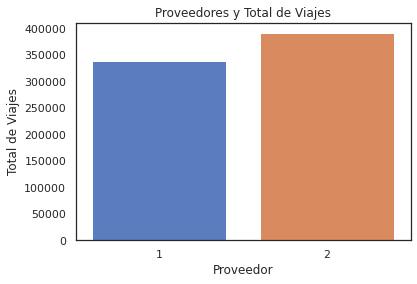

In [229]:
# Se importan las librerias requeridas
import matplotlib.pyplot as plt
import seaborn as sns
# Creo gráfico de barras para visualizar  
vendors = df['vendor_id'].value_counts()
sns.barplot(x=vendors.index, y=vendors.values)
plt.xlabel('Proveedor')
plt.ylabel('Total de Viajes')
plt.title("Proveedores y Total de Viajes")
plt.show()

Puedo identificar que el proveedor número 2 es el que ha registrado más número de viajes. También puedo identificar que estos son valores agrupados por un número base, por lo que no se tiene inconsistencias.

 Continuamos con la siguiente columna.

In [230]:
# Reviso la composición de valores por dato único en la columna passenger_count
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

Exploraré como se encuentran segmentado el número de pasajeros por viaje

Número máximo de pasajeros - 9
Número mínimo de pasajeros - 0


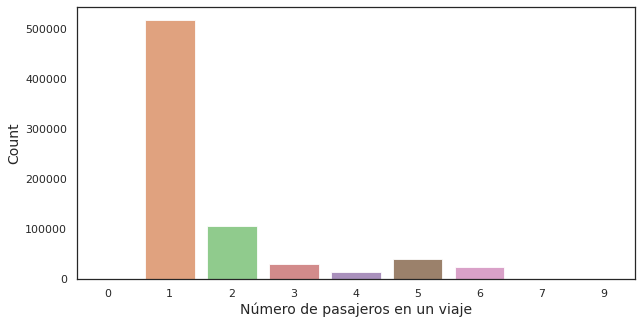

In [231]:
# Explorando la columna Passenger count
passenger_count = df['passenger_count']
print(f"Número máximo de pasajeros - {max(passenger_count)}")
print(f"Número mínimo de pasajeros - {min(passenger_count)}")

fig = plt.figure(figsize=(10,5))
passenger_count = df['passenger_count'].value_counts()
sns.barplot(x=passenger_count.index, y=passenger_count.values, alpha=0.8)
plt.xlabel('Número de pasajeros en un viaje', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Puedo identificar que el número de pasajeros que más se repite por viaje es de 1. Que es algo común considerando que durante el día a día en la ciudad las personas suelen usar este servicio a modo individual.

Lo anterior me confirma que son valores numéricos agrupados por un número base, y que no representa inconsistencias. Finalizamos con la siguiente columna categórica.

In [232]:
# Reviso la composición de valores por dato único en la columna store_and_fwd_flag
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

Puedo ver que esta columna es de una codificación de tipo ordinal. Por lo que haremos su tratamiento para evitar la fuga de datos.

In [233]:
# Hacemos uso del método df.replace() para hacer el cambio de los valores asociados a una característica de ordenamiento numérico
df['store_and_fwd_flag'].replace({'N':0, 'Y':1}, inplace=True)
df['store_and_fwd_flag'].value_counts()

0    725282
1      4040
Name: store_and_fwd_flag, dtype: int64

Luego de la limpieza del set de datos, voy a ver la opción de generar unos gráficos para conocer como puedo tener unos primeros análisis a partir del comportamiento visual de dichos datos. Para ello me gustaría iniciar con una identificación de la correlación entre las columnas del data set.

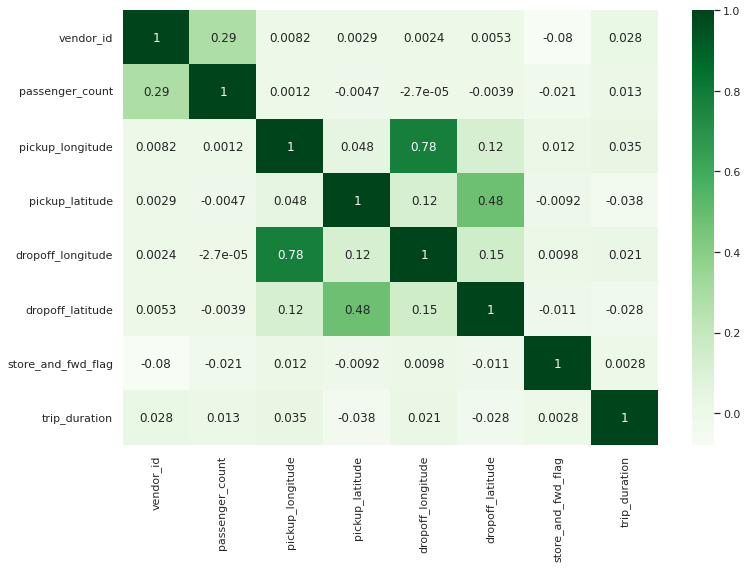

In [234]:
# Se importan las librerias requeridas
import matplotlib.pyplot as plt
import seaborn as sns

# Se genera gráfico de tipo correlacional
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.show()

Como podemos ver entre todas las características, aparte de la correlación con valor 1 entre la misma columna. Solo se destaca la correlación que hay entre la columna dropoff_longitude y pickup_longitude. 

Por lo que procederemos a crear un gráfico entre ambas columnas, pero antes de ello analizaremos los valores estadísticos asociados a estas columnas con el método describe.

Como veo que hay diferentes tipos de valores únicos por columna y entendiendo que toda la composición del set de datos en su gran mayoría es de categoría numérica, me gustaría visualizar la descripción estadística que está relacionada con los datos.

In [235]:
# Mostramos con la función describe todas las estadísticas de las columnas, para obtener valores mínimos, máximos, media, conteo, entre otros que componen el set de datos.
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,0.005539,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,0.074221,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,0.000000,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,0.000000,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,0.000000,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.000000,1.939736e+06


Teniendo mas claridad a partir del analisis de estas estadisticas, procederemos a visualizar las coordenadas de recogida y entrega en cuanto a su comportamiento

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

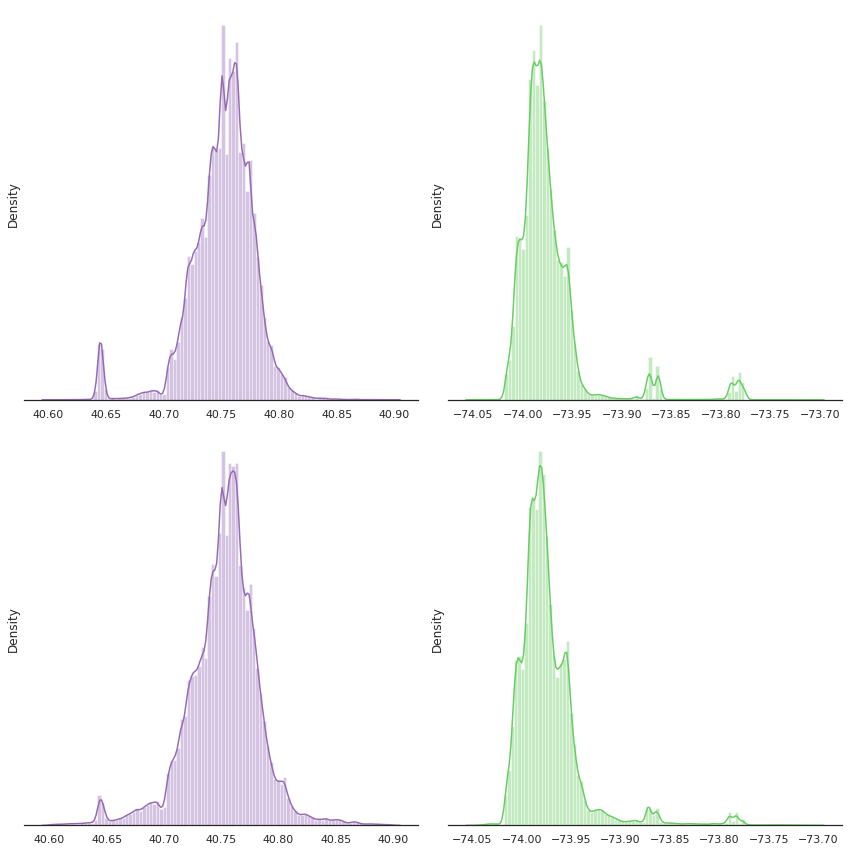

In [236]:
# Se crean filtros asociados a los rangos de analisis de los valores asociados a dicha columna
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]

# Creamos una copia del set de datos para asociarlo a una variable con la cual crearemos el grafico
data_coordinates = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(data_coordinates['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(data_coordinates['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(data_coordinates['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(data_coordinates['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Con lo anterior puedo identificar que para este registro de viajes la latitud de recogida y entrega se centra en torno a 40 a 41, y la longitud se sitúa en torno a -74 y -73.

Esta averiguación esta mas orientada a un analisis ya que finalmente la predicción de la duración puede ser muy variable. No necesariamente los viajes se vayan a llevar dentro de estos puntos en cuanto a locación. Pero es algo interesante de conocer.

In [237]:
# Reviso nuevamente el estado del set de datos luego del tratamiento inicial
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726195 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  726195 non-null  object 
 1   vendor_id           726195 non-null  int64  
 2   pickup_datetime     726195 non-null  object 
 3   dropoff_datetime    726195 non-null  object 
 4   passenger_count     726195 non-null  int64  
 5   pickup_longitude    726195 non-null  float64
 6   pickup_latitude     726195 non-null  float64
 7   dropoff_longitude   726195 non-null  float64
 8   dropoff_latitude    726195 non-null  float64
 9   store_and_fwd_flag  726195 non-null  int64  
 10  trip_duration       726195 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 66.5+ MB
None 



Como el objetivo de este set de datos es de tipo numérico, quisiera validar un enfoque mirando los viajes más largos en cuanto a duración

In [238]:
# Reviso cuales son los viajes más largos asociados a la columna objetivo
print('Duración de los 5 viajes más largos: \n {} '.format(df['trip_duration'].nlargest(5)))
print('\nEl número de filas con 0 como valor de duración del viaje es de {}'.format(len(df[df['trip_duration']==1 ])))

Duración de los 5 viajes más largos: 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64 

El número de filas con 0 como valor de duración del viaje es de 13


He podido encontrar 1 registro con un valor extremadamente grande de 1939736 y 13 con 0 segundos cada uno. Así que eliminaré estas filas. 

In [239]:
# Elimino los valores atípicos encontrados
df = df[df.trip_duration!=df.trip_duration.max()]
df = df[df.trip_duration!=df.trip_duration.min()]

In [240]:
# Dentro del set de datos como vemos, maneja valores de tipo de dato en fechas y horas
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848


Analizando estos datos de tipo fecha yo podría considerar que lo mejor seria aplicar una transformación por medio de una ingeniería de características. Para posteriormente poder enfocarme en el principio del objetivo propuesto en este ejercicio, considero que sería un sobre esfuerzo incluir estas columnas de fecha sin tratar en la aplicación del modelo. Ya que no considero dichas columnas importantes para poder encontrar el punto óptimo de la duración total de viajes.

Realizare el ejercicio por revisar como se podria hacer la conversión de este tipo de caracteristicas.



---



## **Ingeniería de características**

In [241]:
# Conversión de las variables fecha-hora al formato datatime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [242]:
# Crear características adicional para datatime
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [243]:
# Revisión de las columnas del set de datos luego de esta transformación
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_day', 'pickup_month',
       'pickup_weekday', 'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'dropoff_weekday'],
      dtype='object')

In [244]:
# Visualizo el set de datos luego de la aplicación de la ingeniera de características
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,16,29,2,0,16,29,2,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,23,11,3,4,23,11,3,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,17,21,2,6,18,21,2,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,9,5,1,1,10,5,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,6,17,2,2,6,17,2,2


In [245]:
# Dejo de lado las variables que he definido que podrían no ser útiles para predecir la duración del viaje
df = df.drop(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 
              'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [246]:
# Reviso nuevamente el set de datos luego de esta depuración de columnas innecesarias
df.head()

,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_weekday
0,1,0,400,16,29,2,0,16,29,2,0
1,2,0,1100,23,11,3,4,23,11,3,4
2,2,0,1635,17,21,2,6,18,21,2,6
3,6,0,1141,9,5,1,1,10,5,1,1
4,1,0,848,6,17,2,2,6,17,2,2


Como podemos visualizar ya, las columnas son de tipo numérico a excepción de las recién transformadas de tipo datatime

In [247]:
# Convertimos las variables categóricas en variables numéricas
df = pd.get_dummies(df)

In [248]:
# Reviso nuevamente el set de datos luego de esta conversión de tipo de datos en las columnas faltantes y las asocio a una nueva variable
clean_data = df
clean_data.head()

,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_weekday
0,1,0,400,16,29,2,0,16,29,2,0
1,2,0,1100,23,11,3,4,23,11,3,4
2,2,0,1635,17,21,2,6,18,21,2,6
3,6,0,1141,9,5,1,1,10,5,1,1
4,1,0,848,6,17,2,2,6,17,2,2


In [249]:
# Obtengo resumen del tipo de variables
print(clean_data.dtypes)

passenger_count       int64
store_and_fwd_flag    int64
trip_duration         int64
pickup_hour           int64
pickup_day            int64
pickup_month          int64
pickup_weekday        int64
dropoff_hour          int64
dropoff_day           int64
dropoff_month         int64
dropoff_weekday       int64
dtype: object


Finalmente, podemos ver que todos los datos ya están bajo un formato de tipo de dato numérico. El set de datos ha sido tratado correctamente y posteriormente ya lo podremos utilizar para la implementación de nuestro modelo de predicción.



---



## **Visualizaciones con datos tratados**

Luego de la limpieza del set de datos, voy a ver la opción de generar unos gráficos para conocer como puedo tener obtener mas análisis a partir del comportamiento visual de estos datos. Para ello me gustaría iniciar con una identificación de la correlación entre las columnas del data set tratado.

In [250]:
# Verificamos dentro del DataFrame la correlación entre sus columnas
clean_data.corr()

,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_weekday
passenger_count,1.000000,-0.020948,0.016508,0.009911,0.001740,-0.001549,0.025877,0.009245,0.001920,-0.001565,0.026067
store_and_fwd_flag,-0.020948,1.000000,0.003448,0.002142,0.001475,0.000156,-0.002074,0.002770,0.001432,0.000162,-0.001889
trip_duration,0.016508,0.003448,1.000000,0.005574,0.002291,0.012699,-0.002051,0.004188,0.000976,0.013640,-0.003672
pickup_hour,0.009911,0.002142,0.005574,1.000000,-0.001710,-0.003192,-0.081777,0.934893,-0.001565,-0.002936,-0.078472
pickup_day,0.001740,0.001475,0.002291,-0.001710,1.000000,-0.015142,0.005606,-0.001866,0.997924,-0.014783,0.005443
pickup_month,-0.001549,0.000156,0.012699,-0.003192,-0.015142,1.000000,-0.013625,-0.003959,-0.015238,0.999938,-0.013286
pickup_weekday,0.025877,-0.002074,-0.002051,-0.081777,0.005606,-0.013625,1.000000,-0.085525,0.005614,-0.013603,0.993832
dropoff_hour,0.009245,0.002770,0.004188,0.934893,-0.001866,-0.003959,-0.085525,1.000000,-0.002073,-0.004330,-0.089623
dropoff_day,0.001920,0.001432,0.000976,-0.001565,0.997924,-0.015238,0.005614,-0.002073,1.000000,-0.015586,0.005509
dropoff_month,-0.001565,0.000162,0.013640,-0.002936,-0.014783,0.999938,-0.013603,-0.004330,-0.015586,1.000000,-0.013233


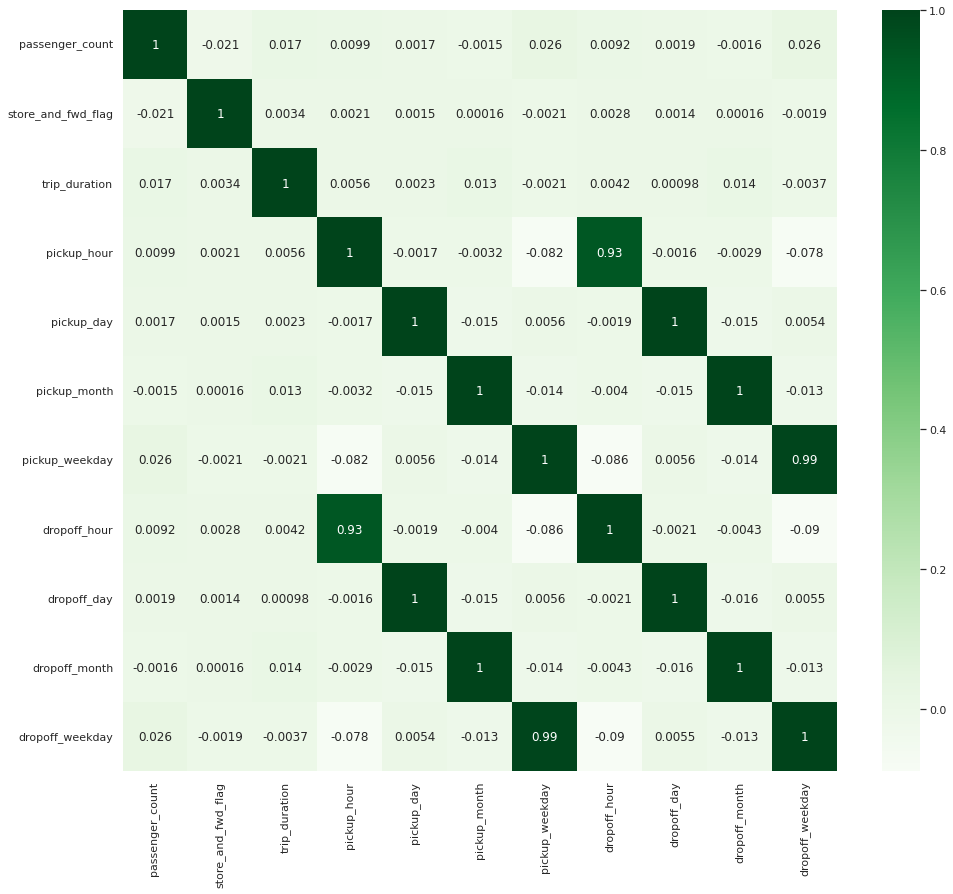

In [251]:
# Se importan las librerias requeridas
import matplotlib.pyplot as plt
import seaborn as sns

# Se genera gráfico de tipo correlacional
plt.figure(figsize=(16,14))
corr = clean_data.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.show()

Observando la gráfica, aparte de la correlación donde las columnas se comparan consigo mismas, puedo rescatar algunas correlación muy fuertes. Como por ejemplo entre las columnas dropoff_hour y pickup_hour, entre dropoff_day y pickup_day, dropoff_month y pickup_month, al igual que dropoff_weekday y pickup_weekday.


Por lo que procederemos a crear varios gráficos entre estas columnas, pero antes de ello analizare como se ve el registro de comportamiento relacionado al objetivo que deseamos obtener, que seria la duración de los viajes.

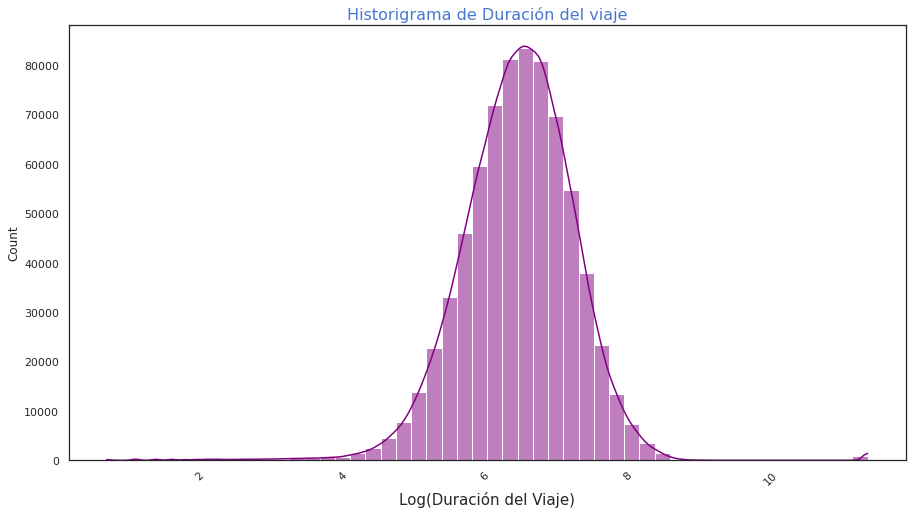

In [252]:
# Se crea historigrama de la columna trip_duration
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(np.log(clean_data['trip_duration'].values), bins = 50, kde = True, color='purple')
clean_data['trip_duration']=np.log(clean_data['trip_duration'])
plt.title('Historigrama de Duración del viaje', fontsize=16, color='b')
plt.xlabel("Log(Duración del Viaje)", fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

Con el gráfico anterior podemos visualizar que la duración de los viajes se centran en gran medida entre los 4000 segundos, logrando una cúspide por encima de los 6000 segundos hasta empezar a reducirse y aplanarse un poco luego de los 8000 segundos.

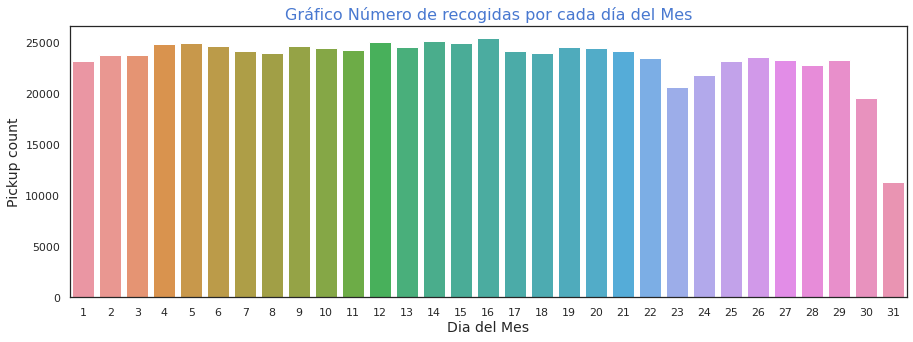

In [253]:
# Gráfico sobre la distribución de las recogidas a lo largo de los días del Mes
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_day', data=clean_data)
plt.title('Gráfico Número de recogidas por cada día del Mes', fontsize=16, color='b')
plt.xlabel('Dia del Mes', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

Logramos ver que durante todos los días del mes, las recogidas de los viajes son similares.

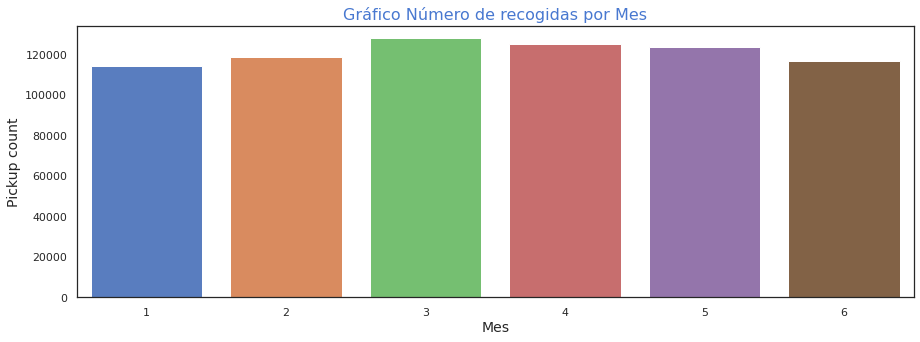

In [254]:
# Gráfico sobre la distribución de las recogidas a lo largo de los meses
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_month', data=clean_data)
plt.title('Gráfico Número de recogidas por Mes', fontsize=16, color='b')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

Vemos que levemente el mes que más se destacaba por encima de los otros meses sería el mes 3, que representaría a marzo.

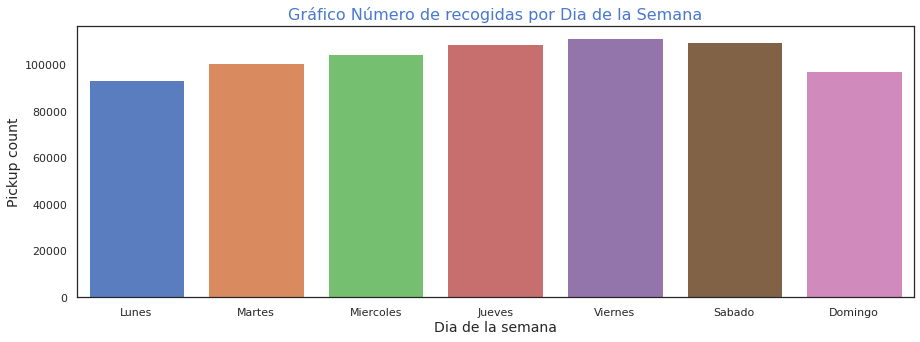

In [255]:
# Gráfico sobre la distribución de las recogidas en el día de la semana
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_weekday', data=clean_data)
plt.title('Gráfico Número de recogidas por Dia de la Semana', fontsize=16, color='b')
plt.xlabel('Dia de la semana', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks([i for i in range(7)], ('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'))
plt.show()

Donde vemos que se obtiene un mayor registro de viajes son los días viernes.

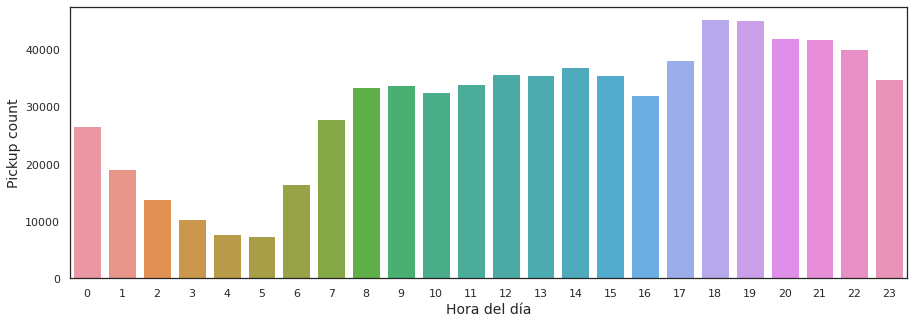

In [256]:
# Gráfico sobre la distribución de las recogidas en la hora del día
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_hour', data=clean_data)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

Podemos identificar que las horas donde hay más afluencia de registros de viajes son entre las 6:00 y 7:00 pm. Que posiblemente pueda estar relacionado con la hora en que la gran mayoría de personas estén de regreso a sus hogares luego de su jornada laboral.

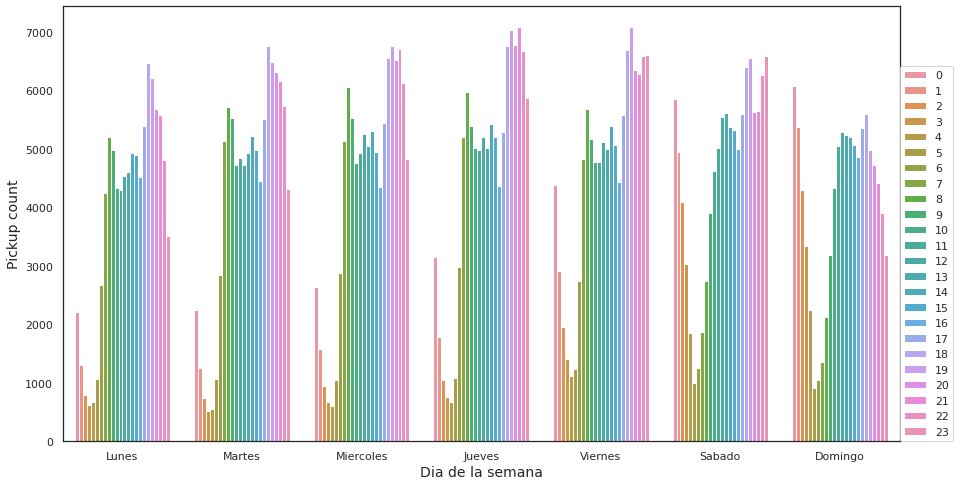

In [257]:
# Gráfico sobre la distribución de las recogidas a lo largo del día de la semana (Por horas)
f = plt.figure(figsize=(15,8))
sns.countplot(x='pickup_weekday', data=clean_data, hue='pickup_hour')
plt.xlabel('Dia de la semana', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks([i for i in range(7)], ('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'))
plt.legend(loc=(1,0))
plt.show()

Este gráfico me entrega unos puntos muy interesantes y es que puedo identificar que los días con mayor número de registros en recogidas son el jueves y viernes, pero especialmente con más afluencia entre las 6:00 pm y 9:00 pm como su cúspide más alta para el caso del día jueves. En el caso del viernes, su punto más alto está a las 7:00 pm y sigue manteniendo su alta afluencia hasta las 11:00 pm.



---



# **Parte 3**

Para esta parte del proyecto, crea una video presentación de 5-10 minutos con diapositivas que esté diseñada para una audiencia TÉCNICA que aborde tu presentación de datos y el análisis exploratorio para tu conjunto de datos seleccionado.

Puesto que esta es una audiencia TÉCNICA, puedes compartir fragmentos de código y discutir los pasos de limpieza. Sin embargo, para tu presentación final, tu audiencia será no técnica y no incluirás este tipo de información.  

Cosas que incluir en tu presentación:

* Introducción y antecedentes del conjunto de datos.
* Explicación de los pasos de limpieza requeridos y una breve explicación de cómo los abordaste en tu conjunto de datos.
* Si había valores nulos, explica cómo los abordaste.
* Al menos dos imágenes exploratorias que hayas utilizado para comprender tu conjunto de datos y lo que has aprendido de cada una de ellas.
* Si procede, cualquier desafío que has encontrado a medida que trabajas con este conjunto de datos y cómo los manejas.  

## **Presentación**

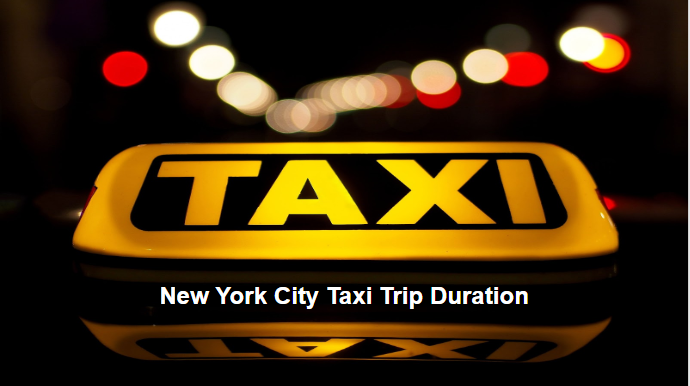

* Diapositivas de la presentación: [Ver Aquí](https://docs.google.com/presentation/d/1yoI2oMfsL_3slvKlL2VujtNtBD_xvqaPaMXgi3CMldk/edit?usp=sharing).
* Video Explicativo de la presentación del proyecto: [Ver Aquí](https://www.loom.com/share/8e2b86e8eb1f40a2b67c20f5ab0cf1e9)



---



# **Parte 4**

* Garantiza que completes los pasos de preprocesamiento adecuados.
* Intenta múltiples modelos y afina los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye todos los modelos e hiperparámetros probados además del modelo final).
* Evalúa el rendimiento del modelo con las métricas adecuados para el modelo.
* Elije tu modelo de “producción” y justifica esta decisión.

## **Preprocesamiento**

Importo los parámetros que requiero utilizar mediante la librería de scikit-learn

In [258]:
# Importamos las bibliotecas requeridas para el manejo de nuestros datos y el modelado
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

Inicialmente, procederemos a segmentar las columnas por su respectiva caracterización mediante una función que nos ayude con ello.

In [259]:
# Función para agrupar las columnas con característica de tipo numérico
num_features = make_column_selector(dtype_include="number")(clean_data) 
_ = clean_data[num_features].apply(lambda x: print("\n",f"max_{x.name}: {x.max()} ----- min_{x.name}: {x.min()}"))


 max_passenger_count: 9 ----- min_passenger_count: 0

 max_store_and_fwd_flag: 1 ----- min_store_and_fwd_flag: 0

 max_trip_duration: 11.366638782699756 ----- min_trip_duration: 0.6931471805599453

 max_pickup_hour: 23 ----- min_pickup_hour: 0

 max_pickup_day: 31 ----- min_pickup_day: 1

 max_pickup_month: 6 ----- min_pickup_month: 1

 max_pickup_weekday: 6 ----- min_pickup_weekday: 0

 max_dropoff_hour: 23 ----- min_dropoff_hour: 0

 max_dropoff_day: 31 ----- min_dropoff_day: 1

 max_dropoff_month: 7 ----- min_dropoff_month: 1

 max_dropoff_weekday: 6 ----- min_dropoff_weekday: 0


Defino las características (X) y el objetivo (y). Utilizamos el train test split en los datos para prepararlos para aprendizaje automático.

In [260]:
# Usando el formato para ML procedo a definir el objetivo y, junto a las características X
X = clean_data.drop(columns=["trip_duration"])
y = clean_data['trip_duration']

# Creo el Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Creo el selector de tipo numérico para todas las columnas dado que no tenemos características categóricas u ordinales

In [261]:
# Procedemos a instanciar el selector de Columnas
num_selector = make_column_selector(dtype_include='number')

# Se seleccionan las columnas de tipo de dato numérico
num_columns = num_selector(X_train)

# Imprimimos la agrupación de este tipo de caracteristicas de manera más organizada para su interpretación
print(f"Las columnas numéricas son: {num_columns}")

Las columnas numéricas son: ['passenger_count', 'store_and_fwd_flag', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday', 'dropoff_hour', 'dropoff_day', 'dropoff_month', 'dropoff_weekday']


Utilizaré pipelines para escalar las columnas numéricas


In [262]:
# Procedo a generar la instancia el transformador Scaler para escalar los datos numéricos
scaler = StandardScaler()

# Genero el pipeline para las características numéricas
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

Todos los datos de preprocesamiento deben estar contenidos en un único objeto de preprocesamiento. En este caso en una única tupla que estaría asociada al Pipeline que creamos para las características numéricas

In [263]:
# Género el instanciamiento del Transformador de Columna
# Posteriormente creo la Tupla para el Column Transformer donde se relaciona el respectivo pipeline con el selector de tipo de dato numérico
number_tuple = (numeric_pipe, num_selector)

# Asocio el ColumnTransformer a un preprocesador
preprocessor = make_column_transformer(number_tuple)

In [264]:
# Ajusto el objeto de preprocesamiento y verifico que solo encaje en el Transformador de Columna a los datos de entrenamiento del set de datos
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1b6707c910>)])

In [265]:
# Ya teniendo validado que el método fit funciono con el transformador agrupado dentro del ColumnTransformer
# Procedo a usar este mismo para transformar los datos de entrenamiento y de prueba
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [266]:
# Reviso los resultados, verifico si hay valores faltantes, al igual que los datos se hayan escalado
print(np.isnan(X_train_processed).sum().sum(), 'valores faltantes en el conjunto de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores faltantes en el conjunto de pruebas')
print('\n')
print('Todos los datos en X_train_processed son', X_train_processed.dtype)
print('Todos los datos en X_test_processed son', X_test_processed.dtype)
print('\n')
print('La forma de los esta en:', X_train_processed.shape)
print('\n')
X_train_processed

0 valores faltantes en el conjunto de entrenamiento
0 valores faltantes en el conjunto de pruebas


Todos los datos en X_train_processed son float64
Todos los datos en X_test_processed son float64


La forma de los esta en: (544635, 10)




array([[-0.5047702 , -0.07542668,  0.37108912, ..., -0.63268614,
        -1.49771985,  1.50615331],
       [-0.5047702 , -0.07542668, -0.56591104, ...,  0.86241767,
         0.28648011,  0.99512682],
       [ 0.25656195, -0.07542668, -0.87824443, ...,  0.28737774,
         0.28648011, -1.56000563],
       ...,
       [-0.5047702 , -0.07542668,  1.30808928, ...,  1.32244961,
        -1.49771985, -0.53795265],
       [ 0.25656195, -0.07542668, -1.97141128, ...,  0.40238573,
        -1.49771985, -1.04897914],
       [-0.5047702 , -0.07542668,  0.68342251, ..., -1.55275002,
        -0.90298653, -1.04897914]])

In [267]:
# Paso la transformación a un DataFrame de Pandas para que sea fácil de ver e interpretar como quedaron los datos
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-0.504770,-0.075427,0.371089,-0.632588,-1.497650,1.509944,0.367273,-0.632686,-1.497720,1.506153
1,-0.504770,-0.075427,-0.565911,0.862519,0.286707,0.998305,-0.403506,0.862418,0.286480,0.995127
2,0.256562,-0.075427,-0.878244,0.287478,0.286707,-1.559891,-0.865973,0.287378,0.286480,-1.560006
3,-0.504770,-0.075427,-0.097411,-0.172555,0.286707,-0.024973,-0.095194,-0.172654,0.286480,-0.026926
4,3.301891,-0.075427,0.839589,-0.172555,-0.902864,1.509944,0.829741,-0.172654,-0.902987,1.506153
5,-0.504770,-0.075427,-1.659078,-1.667661,0.881493,1.509944,-1.636752,-1.667758,0.881213,1.506153
6,-0.504770,-0.075427,-0.565911,-0.632588,0.286707,1.509944,-0.557661,-0.632686,0.286480,1.506153
7,-0.504770,-0.075427,0.683423,0.632502,0.881493,0.998305,0.829741,0.632402,0.881213,0.995127
8,-0.504770,-0.075427,-1.346745,0.862519,-1.497650,0.998305,-1.328440,0.862418,-1.497720,0.995127
9,-0.504770,-0.075427,-0.878244,-1.552653,-0.308078,-0.536613,-0.865973,-1.552750,-0.308253,-0.537953


In [268]:
# Visualizo finalmente luego de la transformación como quedaron los datos de entrenamiento y su tipo de dato por columna
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544635 entries, 0 to 544634
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       544635 non-null  float64
 1   1       544635 non-null  float64
 2   2       544635 non-null  float64
 3   3       544635 non-null  float64
 4   4       544635 non-null  float64
 5   5       544635 non-null  float64
 6   6       544635 non-null  float64
 7   7       544635 non-null  float64
 8   8       544635 non-null  float64
 9   9       544635 non-null  float64
dtypes: float64(10)
memory usage: 41.6 MB




---



## 🥼 **Modelo Regresión Lineal**

Importamos la librería y procedemos a crear instancia del modelo

In [269]:
# Importo librería y se genera instancia del modelo en una variable
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

Ajusto el modelo a los datos de entrenamiento previamente pre procesados para entrenar el modelo

In [270]:
# Generamos el ajuste para que el modelo aprenda sobre la relación entre las características y el objetivo
lreg.fit(X_train_processed, y_train)

LinearRegression()

Procedo a obtener los valores de predicciones del modelo

In [315]:
# Obtengo las predicciones del conjunto de entrenamiento y del conjunto de prueba
train_preds = lreg.predict(X_train_processed)
test_preds = lreg.predict(X_test_processed)
print(train_preds)
print('')
print(test_preds)

[6.30787573 6.63869063 6.40895955 ... 6.39104498 6.30525327 6.37949876]

[6.45747333 6.43268568 6.62317    ... 6.57658603 6.33323956 6.44737235]


Importo las librerias para usar las métricas requeridas para evaluar el modelo de regresión

In [272]:
# Importando librerias para calcular el error absoluto medio (EAM), el error cuadrático medio (ECM) y la raíz del error cuadrático medio (RECM)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Evaluó el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2

In [280]:
# Obtengo el valor que se le asignara a las variables r2 de train y test
r2_train = r2_score(y_train, train_preds) * 100
r2_test = r2_score(y_test, test_preds) * 100

# R^2 tiene dos entradas r2_score(valores_reales, valores_de_predicción)
# Procedo a evaluar mediante el coeficiente de determinación (R^2) los conjuntos de entrenamiento y de prueba
print("Valor de métrica R2 para conjunto de entrenamiento:", r2_train.round(1))
print("\n")
print("Valor de métrica R2 para conjunto de prueba:", r2_test.round(1))

Valor de métrica R2 para conjunto de entrenamiento: 12.1


Valor de métrica R2 para conjunto de prueba: 12.2


**Análisis:**

El valor R^2 en el conjunto de entrenamiento es 12.1, y el valor R^2 en el conjunto de prueba es 12.2. Por lo que podríamos definir que el modelo pudiera estar subajustado dado de que nos dieron en ambas evaluaciones unos valores muy bajos, tambien vemos que quizá el modelo pueda funcionar un poco levemente mejor en los datos de prueba que en los datos de entrenamiento. Pero finalmente para ambos se crea predicciones malas.

In [285]:
# Utilizamos el MSE para evaluar el error de predicción
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

# Utilizamos el RMSE para verificar el valor obtenido previamente mediante el modelo MSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("Valor de métrica RECM para el conjunto de entrenamiento es:", rmse_train.round(3))
print("\n")
print("Valor de métrica RECM para el conjunto de prueba es:", rmse_test.round(3))

Valor de métrica RECM para el conjunto de entrenamiento es: 0.744


Valor de métrica RECM para el conjunto de prueba es: 0.742


## 🎯**Conclusión Modelo Regresión Lineal**


Luego de evaluar el modelo de rendimiento usando la puntuación R^2 y el error de predicción, no obtuvimos un buen comportamiento. Aquí algunas de las conclusiones analizadas:

*   El coeficiente de determinación para ambos conjuntos estaba más orientado a 0, con un nivel bajo de rendimiento. El de prueba con una muy leve mejor respuesta que el conjunto de entrenamiento. Por lo que podríamos definir que el modelo pudiera estar subajustado(underfitting) dado de que nos dieron en ambas evaluaciones unos valores muy bajos por debajo del 13% sin poder encontrar patrones en los datos que se correlacionen con el objetivo que estoy buscando.
* Finalmente, con el RMSE (Raíz del Error Cuadrático Medio) se hizo evidente que los errores grandes incrementaron al quedar el rendimiento en 0.74 en el conjunto de entrenamiento y de pruebas.

Todo lo anterior nos lleva a inferir que este comportamiento puede darse a que quizás se requieren más datos para el set de datos en miras de obtener un mejor comportamiento y que tambien la poca correlación entre columnas no aportaria a manejar un mejor sesgo que permitiera lograr un mejor equilibrio.




---



## 🥼 **Modelo Árbol de Regresión**

Importamos la librería y procedemos a crear instancia del modelo

In [275]:
# Importo librería y se genera instancia del modelo en una variable
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

Ajusto el modelo usando los datos de entrenamiento

In [276]:
# El modelo está aprendiendo la relación entre las características (X) y el objetivo (y).
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

Género la predicción de los valores objetivos para el conjunto de entrenamiento y de prueba

In [312]:
# Obteniendo las predicciones del conjunto de entrenamiento y del conjunto de prueba
train_preds_tree = dec_tree.predict(X_train_processed)
test_preds_tree = dec_tree.predict(X_test_processed)
print(train_preds_tree)
print('')
print(test_preds_tree)

[6.29917692 6.49438617 6.28126675 ... 6.38133459 6.13616405 6.30958499]

[6.4164925  6.65403115 7.25238396 ... 6.46085856 6.33256709 6.31096439]


Evaluó el modelo con las instancias generadas

In [278]:
# Evaluando el modelo
train_score_tree = dec_tree.score(X_train_processed, y_train)
test_score_tree = dec_tree.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", train_score_tree)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", test_score_tree)

La métrica de evaluación para el conjunto de entrenamiento es:  0.2654537772587321


La métrica de evaluación para el conjunto de prueba es:  0.11461709883158588


**Determino la profundidad del árbol por defecto.**

In [281]:
# Ejecutamos funciones para la búsqueda de valores
depth_tree = dec_tree.get_depth()
n_leaves_tree = dec_tree.get_n_leaves()
print("La profundidad del árbol por defecto es: ", depth_tree)
print("La cantidad de nodos hojas del árbol por defecto es: ", n_leaves_tree)

La profundidad del árbol por defecto es:  47
La cantidad de nodos hojas del árbol por defecto es:  45779


Probaré diferentes valores para max_depth y determinar el valor óptimo basándose en el mejor (el más alto) valor R2. Trataré de encontrar el max_depth óptimo (ajuste de hiperparámetro)

In [282]:
# Inicialmente fijo una profundidad máxima en 2
dec_tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_reg2.fit(X_train_processed, y_train)
train_score_tree_2 = dec_tree_reg2.score(X_train_processed, y_train)
test_score_tree_2 = dec_tree_reg2.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", train_score_tree_2)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", test_score_tree_2)

La métrica de evaluación para el conjunto de entrenamiento es:  0.015323422477962145


La métrica de evaluación para el conjunto de prueba es:  0.014803788562055664


Con las anteriores puntuaciones podemos identificar que el modelo esta subajustado al tener un rendimiento muy cercano a 0 tanto para el conjunto de entrenamiento como de pruebas.

**Ajusto nuevamente el max_depth óptimo a la mitad de profundidad por defecto**

In [286]:
# Ajustamos el hiperparámetro a 23
dec_tree_reg_23 = DecisionTreeRegressor(max_depth = 23, random_state = 42)
dec_tree_reg_23.fit(X_train_processed, y_train)
train_score_tree_23 = dec_tree_reg_23.score(X_train_processed, y_train)
test_score_tree_23 = dec_tree_reg_23.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", train_score_tree_23)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", test_score_tree_23)

La métrica de evaluación para el conjunto de entrenamiento es:  0.2243415118230151


La métrica de evaluación para el conjunto de prueba es:  0.13606603567298037


En este caso vemos que el modelo ya tiende a tener sobre ajuste al ver que la métrica de evaluación está mucho mejor en el conjunto de entrenamiento que del conjunto de prueba. Aunque cabe destacar que si mejoro en buena medida las evaluaciones.

**Aplicare la función de GridSearch para lograr obtener el mejor max_depth óptimo**

In [287]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 47)) # Evaluare cada valor entre 2 y 47
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree_reg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree_reg.fit(X_train_processed, y_train)
    score = dec_tree_reg.score(X_test_processed, y_test)
    r2.append(score)

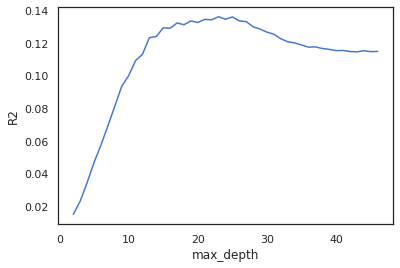

In [288]:
# Creo gráfico para visualizar qué max_depth lleva a una puntuación R2 más alta
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

Por la imagen anterior, parece que la mejor puntuación del modelo es cuando el parámetro max_depth es 25. Lo probaré.

In [289]:
# Fijare la profundidad máxima en 25
dec_tree_reg25 = DecisionTreeRegressor(max_depth = 25, random_state = 42)
dec_tree_reg25.fit(X_train_processed, y_train)
train_score_tree_25 = dec_tree_reg25.score(X_train_processed, y_train)
test_score_tree_25 = dec_tree_reg25.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", train_score_tree_25)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", test_score_tree_25)

La métrica de evaluación para el conjunto de entrenamiento es:  0.23754038120521814


La métrica de evaluación para el conjunto de prueba es:  0.13596564508805742


Aunque los valores de rendimiento mejoraron para ambos conjuntos, se sigue presentando valores no tan deseados para obtener un buen modelo predictivo con este tipo de análisis.

## 🎯**Conclusión Modelo Árboles de Regresión**


Luego de evaluar el modelo de Árboles de Regresión usando la puntuación R^2 con diferentes hiperpárametros. LLegamos a la siguiente conclusiones analizadas:

*   El coeficiente de determinación para ambos conjuntos estaba más orientado a 0, con un nivel bajo de rendimiento. El conjunto de entrenamiento siempre tuvo mejor respuesta a las variaciones respecto al conjunto de prueba.
* El conjunto de prueba en sus diversas métricas de evaluación a partir de un mayor número de nodos mostro leve mejoras a partir de 23 a 25 nodos. Por lo que nos indica una correlación defectuosa del conjunto y las caracteristicas en comparación a su objetivo.

Con lo anterior definimos que el modelo esta subajustado al tener un rendimiento por debajo del 23.7% para el conjunto de entrenamiento y un 13.5% para de pruebas. 

Tambien notamos un modelo de varianza baja con sobreajuste de los datos de entrenamiento ya que el rendimiento de entrenamiento estuvo muy alejado del rendimiento del de prueba.



---



## 🥼 **Modelo KNN de Regresión**

Importamos la librería y procedemos a crear instancia del modelo

In [297]:
# Importo librería y se genera instancia del modelo en una variable
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
knn_reg = KNeighborsRegressor()

Entreno el modelo en los datos, almacenando la información aprendida de los datos.

In [308]:
# El modelo está aprendiendo la relación entre x y el objetivo definido previamente
knn_reg.fit(X_train_processed, y_train)

KNeighborsRegressor()

Genero la predicción para el conjunto de datos

In [313]:
# Obtengo las predicciones del conjunto de datos
train_preds_knn = knn_reg.predict(X_train_processed)
test_preds_knn = knn_reg.predict(X_test_processed)
print(train_preds_knn)
print('')
print(test_preds_knn)

[6.07237042 6.44780853 6.47529398 ... 6.47570993 6.08251394 5.87878211]

[6.53377646 6.56029689 7.14307409 ... 6.43782399 6.20729513 6.50543919]


Evaluó el rendimiento del modelo

In [310]:
# Calculamos la exactitud de la clasificación
knn_train_score = knn_reg.score(X_train_processed, y_train).round(2)
print("La métrica de evaluación para el modelo clasificador en el conjunto de entrenamiento es: ", knn_train_score * 100)
print("\n")
knn_test_score = knn_reg.score(X_test_processed, y_test).round(2)
print("La métrica de evaluación para el modelo clasificador en el conjunto de prueba es: ", knn_test_score * 100)

La métrica de evaluación para el modelo clasificador en el conjunto de entrenamiento es:  9.0


La métrica de evaluación para el modelo clasificador en el conjunto de prueba es:  -2.0


Se evalua el 

In [306]:
#np.sqrt(mean_squared_error(y, trip_duration_knn_preds))

0.7607164092019567